Autor: Carlos Juárez
Fecha: 4 de septiembre de 2024
Descripción: Modelo de Cuarto del Automóvil


In [81]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt

# Datos de las variables
Mc = 250; Kc = 15000; Bc = 1000
Mw = 40; Kw = 125000; Bw = 100
g = 9.81

In [82]:
# Defino las funciones de cada ecucación de estado
def f1(x1,x2,x3,x4,y,vy,t):
    return x2
def f2(x1,x2,x3,x4,y,vy,t):
    return -(Kc+Kw)/Mw*x1 - (Bc+Bw)/Mw*x2 + Kc/Mw * x3 + Bc/Mw * x4 + Kw/Mw * y + Bw/Mw * vy - g
def f3(x1,x2,x3,x4,y,vy,t):
    return x4
def f4(x1,x2,x3,x4,y,vy,t):
    return Kc/Mc*x1 + Bc/Mc*x2 - Kc/Mc*x3 - Bc/Mc * x4 - g

In [83]:
# definimos los tiempos de simulación
tfin = 10
h = 0.001
t = np.arange(0,tfin,h)

# defino la entrada
y = np.empty(len(t))
for i in range(0,len(t)):
    # cambio de y en 5 s
    if t[i]<5:
        y[i] = 0
    else:
        y[i] = 0.1

# cálculo de dy/dt
vy = np.zeros(len(t))
for i in range(1,len(y)-1):
    
    vy[i] = (y[i+1]-y[i-1])/(2*h)

print(vy)

[0. 0. 0. ... 0. 0. 0.]


In [95]:
# Condiciones iniciales
xw0 = Mc/Kc*g-g*((Kc+Kw)*Mc/(Kc*Kw)+Mw/Kw)
vw0 = 0
xc0 = -g*((Kc+Kw)*Mc/(Kc*Kw)+Mw/Kw)
vc0 = 0
# solución de la ecuación diferencial por Heun
x1 = np.zeros(len(t))
x2 = np.zeros(len(t))
x3 = np.zeros(len(t))
x4 = np.zeros(len(t))
# valores iniciales
x1[0] = xw0
x2[0] = vw0
x3[0] = xc0
x4[0] = vw0
for i in range(0,len(t)-1):
    k11 = f1(x1[i],x2[i],x3[i],x4[i],y[i],vy[i],t[i])
    k12 = f2(x1[i],x2[i],x3[i],x4[i],y[i],vy[i],t[i])
    k13 = f3(x1[i],x2[i],x3[i],x4[i],y[i],vy[i],t[i])
    k14 = f4(x1[i],x2[i],x3[i],x4[i],y[i],vy[i],t[i])
    x1temp = x1[i] + h * k11
    x2temp = x2[i] + h * k12
    x3temp = x3[i] + h * k13
    x4temp = x4[i] + h * k14

    k21 = f1(x1temp,x2temp,x3temp,x4temp,y[i+1],vy[i+1],t[i+1])
    k22 = f2(x1temp,x2temp,x3temp,x4temp,y[i+1],vy[i+1],t[i+1])
    k23 = f3(x1temp,x2temp,x3temp,x4temp,y[i+1],vy[i+1],t[i+1])
    k24 = f4(x1temp,x2temp,x3temp,x4temp,y[i+1],vy[i+1],t[i+1])

    x1[i+1] = x1[i] + h * (k11+k21)/2
    x2[i+1] = x2[i] + h * (k12+k22)/2
    x3[i+1] = x3[i] + h * (k13+k23)/2
    x4[i+1] = x4[i] + h * (k14+k24)/2

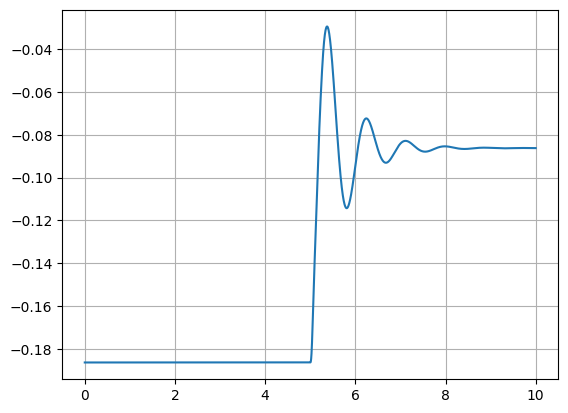

In [97]:
plt.plot(t,x3)
plt.grid(visible = True)
plt.show()

In [92]:
Mc/Kc*g

0.1635